In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import diffimTests as dit

In [2]:
varSourceFlux = 620. * np.sqrt(2.)
obj1 = dit.DiffimTest(varFlux2=np.repeat(varSourceFlux, 50), n_sources=500, sourceFluxRange=(200, 20000),
                     templateNoNoise=False, skyLimited=False)
obj2 = obj1.clone()

{'ZOGY': {'FP': 4, 'FN': 17, 'TP': 33}, 'ALstack': {'FP': 7, 'FN': 18, 'TP': 32}, 'SZOGY': {'FP': 9, 'FN': 23, 'TP': 27}, 'ALstack_decorr': {'FP': 7, 'FN': 17, 'TP': 33}}


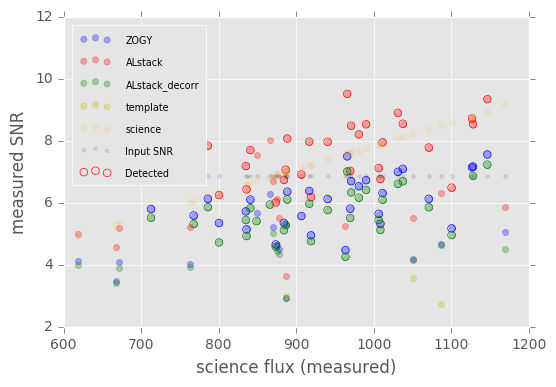

In [3]:
res1 = obj1.runTest(zogyImageSpace=False, returnSources=True)
df1, _ = obj1.doPlotWithDetectionsHighlighted(res1, transientsOnly=True, addPresub=True, 
                                              xaxisIsScienceForcedPhot=True,
                                              skyLimited=False, alpha=0.3)
del res1['sources']
print res1
plt.xlim(600, 1200)
plt.ylim(2, 12);

{'ZOGY': {'FP': 4, 'FN': 19, 'TP': 31}, 'ALstack': {'FP': 7, 'FN': 18, 'TP': 32}, 'SZOGY': {'FP': 7, 'FN': 26, 'TP': 24}, 'ALstack_decorr': {'FP': 7, 'FN': 17, 'TP': 33}}


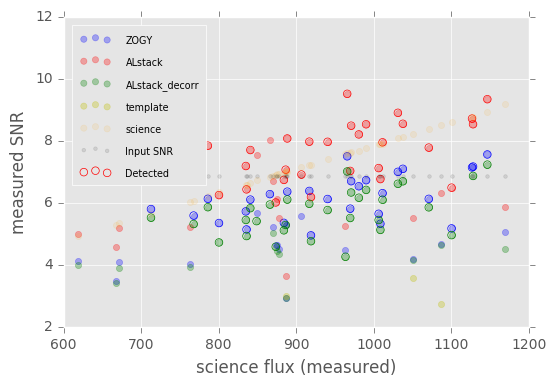

In [4]:
res2 = obj2.runTest(zogyImageSpace=True, returnSources=True)
df2, _ = obj2.doPlotWithDetectionsHighlighted(res2, transientsOnly=True, addPresub=True, 
                                              xaxisIsScienceForcedPhot=True,
                                              skyLimited=False, alpha=0.3)
del res2['sources']
print res2
plt.xlim(600, 1200)
plt.ylim(2, 12);

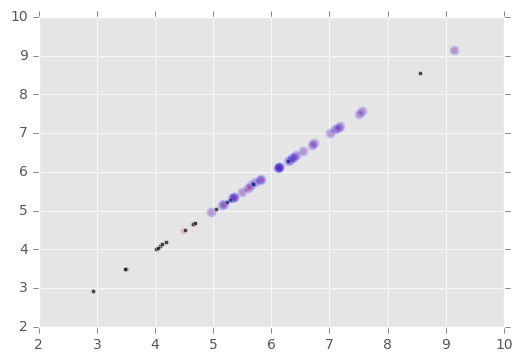

In [5]:
plt.scatter(df1[df1.ZOGY_detected == True].ZOGY_SNR.values,
            df2[df1.ZOGY_detected == True].ZOGY_SNR.values, c='r', alpha=0.2)
#ax = df[df.ZOGY_detected == True].plot.scatter('ZOGY_SNR', 'ALstack_decorr_SNR', c='r', alpha=0.2)
plt.scatter(df1[df1.ZOGY_detected == False].ZOGY_SNR.values,
            df2[df1.ZOGY_detected == False].ZOGY_SNR.values, c='k', s=10, alpha=0.7)
#df[df.ZOGY_detected == False].plot.scatter('ZOGY_SNR', 'ALstack_decorr_SNR', c='k', s=10, alpha=0.7, ax=ax)
plt.scatter(df1[df2.ZOGY_detected == True].ZOGY_SNR.values,
            df2[df2.ZOGY_detected == True].ZOGY_SNR.values, c='b', s=50, alpha=0.2)
#df[df.ALstack_decorr_detected == True].plot.scatter('ZOGY_SNR', 'ALstack_decorr_SNR', c='b', s=50, alpha=0.2, ax=ax)
#plt.xlim(3.5, 7.);
#plt.ylim(3.5, 7.);

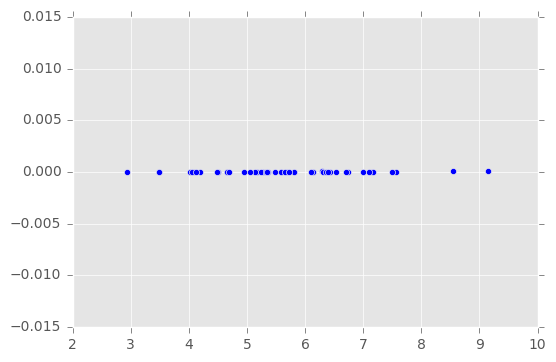

In [6]:
plt.scatter(df1.ZOGY_SNR.values,
            df2.ZOGY_SNR.values - df1.ZOGY_SNR.values)
#plt.scatter(df1[df1.ZOGY_detected == False].ZOGY_SNR.values,
#            df2[df1.ZOGY_detected == False].ZOGY_SNR.values, c='k', s=10, alpha=0.7)
#plt.scatter(df1[df2.ZOGY_detected == True].ZOGY_SNR.values,
#            df2[df2.ZOGY_detected == True].ZOGY_SNR.values, c='b', s=50, alpha=0.2)

In [7]:
tmp1 = df1[(df1.ZOGY_detected == True) & (df2.ZOGY_detected == False)]
dit.sizeme(tmp1[tmp1.columns[0:12]])

,inputFlux,templateFlux,scienceFlux,inputId,inputCentroid_x,inputCentroid_y,inputSNR,ZOGY_SNR,ZOGY_flux,ZOGY_fluxSigma,ZOGY_detected,ALstack_SNR
4,876.812409,-52.629421,906.591878,5,45.330432,289.459958,6.86671,5.577491,908.469302,162.881357,True,6.916586
14,876.812409,82.250255,873.477211,15,219.474610,74.006090,6.86671,4.659127,763.760858,163.927884,True,6.015121
39,876.812409,148.303281,963.457376,40,389.802609,352.644536,6.86671,4.477738,735.941503,164.355650,True,5.270280


In [8]:
tmp2 = df2[(df1.ZOGY_detected == True) & (df2.ZOGY_detected == False)]
dit.sizeme(tmp2[tmp2.columns[0:12]])

,inputFlux,templateFlux,scienceFlux,inputId,inputCentroid_x,inputCentroid_y,inputSNR,ZOGY_SNR,ZOGY_flux,ZOGY_fluxSigma,ZOGY_detected,ALstack_SNR
4,876.812409,-52.629421,906.591878,5,45.330432,289.459958,6.86671,5.577486,908.468441,162.881357,False,6.916586
14,876.812409,82.250255,873.477211,15,219.474610,74.006090,6.86671,4.659130,763.761351,163.927884,False,6.015121
39,876.812409,148.303281,963.457376,40,389.802609,352.644536,6.86671,4.477737,735.941386,164.355650,False,5.270280


stats(mean=8.6268002312066971e-08, stdev=0.00049012443631784935, min=-0.0026976536866953893, max=0.0028890396107108529)
stats(mean=0.0, stdev=0.0, min=0.0, max=0.0)
A&L(dec): stats(mean=0.031971347, stdev=24.299332, min=-93.684105, max=90.242195)
ZOGY: stats(mean=0.18963124317575239, stdev=24.283352846354294, min=-119.24590675099815, max=143.51005786342861)
A&L(dec) - ZOGY: stats(mean=0.040762702557249335, stdev=2.4636707247856244, min=-10.683150086343279, max=34.505564757225699)
A&L(dec) - A&L: stats(mean=-0.028923899, stdev=6.8198528, min=-32.886147, max=36.535721)
Added 0: stats(mean=8.6268002312066971e-08, stdev=0.00049012443631784935, min=-0.0026976536866953893, max=0.0028890396107108529)
Added 1: stats(mean=0.0, stdev=0.0, min=0.0, max=0.0)


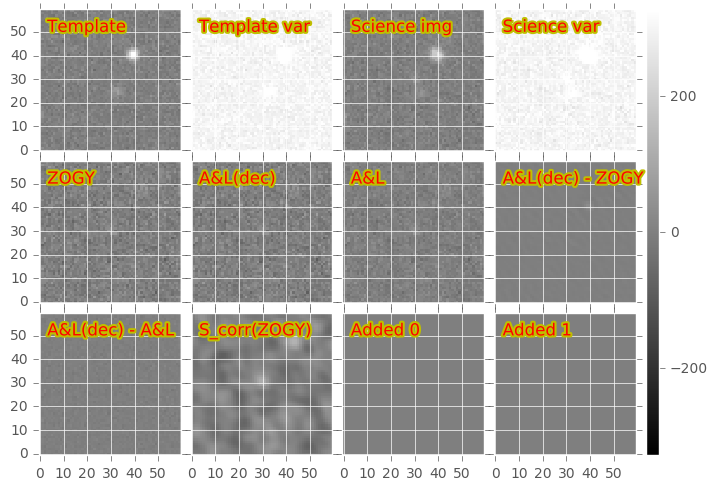

In [12]:
tmpIm = obj1.D_ZOGY.im - obj2.D_ZOGY.im
print dit.computeClippedImageStats(tmpIm)
tmpVar = obj1.D_ZOGY.var - obj2.D_ZOGY.var
print dit.computeClippedImageStats(tmpVar)

obj2.doPlot([tmp1.inputCentroid_y.values[2], tmp1.inputCentroid_x.values[2], 30], 
            include_Szogy=True, addedImgs=(tmpIm, tmpVar));

OK, let's see what's going on in the ZOGY / image space version.

UPDATE: I think I realized what's happening. In the `image space` version, I am not convolving the variance planes with the same kernels as the images. I am just adding the original variance planes as I do in the `non-image space` version. This is wrong. I need to convolve the variance planes and then add them. I also need to do that (after FFT-ing) in the `non-image space` version.

UPDATE2: Data above is after fixing for this, so it is not actually the cause. There is this tiny weird "echo" residual near each variable source.

(41, 41)
stats(mean=0.57698438610305558, stdev=17.337052968613975, min=-74.0, max=906.0)
stats(mean=0.88270007525378957, stdev=17.442291202031928, min=-82.0, max=611.0)
2.998810232 2.998810232


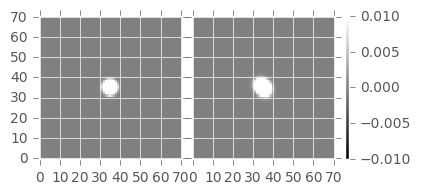

In [8]:
im1, im1_psf, sig1 = obj2.im1.im, obj2.im1.psf, obj2.im1.sig
im2, im2_psf, sig2 = obj2.im2.im, obj2.im2.psf, obj2.im2.sig
F_r = F_n = 1.
padSize = 15 #im1_psf.shape[0]
print im1_psf.shape

print dit.computeClippedImageStats(im1)
#sig1 = dit.computeClippedImageStats(im1).stdev
print dit.computeClippedImageStats(im2)
#sig2 = dit.computeClippedImageStats(im2).stdev

sigR, sigN, P_r_hat, P_n_hat, denom, padded_psf1, padded_psf2 = dit.zogy.ZOGYUtils(im1, im2, im1_psf, im2_psf, sig1, 
                                                                                   sig2, F_r, F_n, padSize=padSize)
print padded_psf1.sum(), padded_psf2.sum()

delta = 0.
K_r_hat = (P_r_hat + delta) / (denom + delta)
K_n_hat = (P_n_hat + delta) / (denom + delta)
K_r = np.fft.ifft2(K_r_hat).real
K_n = np.fft.ifft2(K_n_hat).real

dit.plotImageGrid((padded_psf1, padded_psf2), clim=(-0.01, 0.01))

(71, 71)
(57, 57)


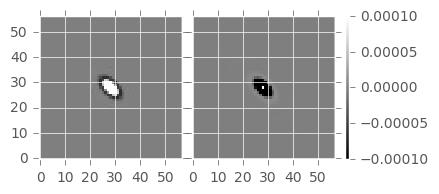

In [9]:
print K_n.shape
ps = padSize // 2
K_n = K_n[ps:-ps, ps:-ps]
K_r = K_r[ps:-ps, ps:-ps]
print K_n.shape
#K_n /= K_n.sum()
#K_r /= K_r.sum()
dit.plotImageGrid((K_n, K_r), clim=(-0.0001, 0.0001))

In [14]:
import scipy
im1c = scipy.ndimage.filters.convolve(im1, K_n, mode='constant', cval=np.nan)
im2c = scipy.ndimage.filters.convolve(im2, K_r, mode='constant', cval=np.nan)
D = im2c - im1c
D *= np.sqrt(sig1**2. + sig2**2.)

stats(mean=0.0056942915993455964, stdev=0.9897907868075726, min=-4.8623081933217671, max=5.8516579975473162)
stats(mean=0.2058585436362477, stdev=24.316328799635286, min=-119.24656319863152, max=143.51004823547262)
stats(mean=-0.19746464739594924, stdev=23.32482416517308, min=-137.65839023792532, max=114.38425500530975)
A&L(dec): stats(mean=0.031971347, stdev=24.299332, min=-93.684105, max=90.242195)
ZOGY: stats(mean=0.18963124317575239, stdev=24.283352846354294, min=-119.24590675099815, max=143.51005786342861)
A&L(dec) - ZOGY: stats(mean=0.040762702764209909, stdev=2.4636707243493903, min=-10.683150086343279, max=34.505564757225699)
A&L(dec) - A&L: stats(mean=-0.028923899, stdev=6.8198528, min=-32.886147, max=36.535721)
Added 0: stats(mean=0.2058585436362477, stdev=24.316328799635286, min=-119.24656319863152, max=143.51004823547262)
Added 1: stats(mean=-0.19746464739594924, stdev=23.32482416517308, min=-137.65839023792532, max=114.38425500530975)


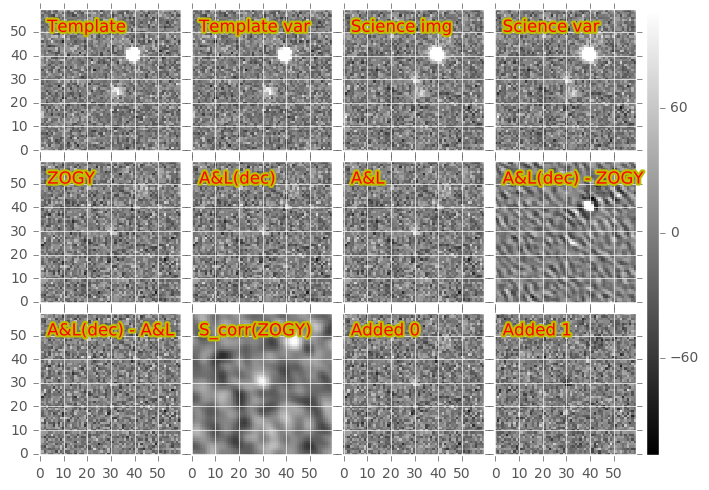

In [15]:
tmpIm = obj1.D_ZOGY.im - D
print dit.computeClippedImageStats(obj1.D_ZOGY.im)
print dit.computeClippedImageStats(D)
print dit.computeClippedImageStats(tmpIm)

obj2.doPlot([tmp.inputCentroid_y.values[2], tmp.inputCentroid_x.values[2], 30], include_Szogy=True, 
            addedImgs=(D, tmpIm,));

In [16]:
D2 = dit.zogy.performZOGYImageSpace(im1, im2, im1_psf, im2_psf, sig1, sig2, F_r, F_n, padSize=padSize)
#D2 *= np.sqrt(sig1**2. + sig2**2.)
tmpIm2 = D2 - D
print dit.computeClippedImageStats(D)
print dit.computeClippedImageStats(D2)
print dit.computeClippedImageStats(tmpIm2)

stats(mean=0.2058585436362477, stdev=24.316328799635286, min=-119.24656319863152, max=143.51004823547262)
stats(mean=0.2058585436362477, stdev=24.316328799635286, min=-119.24656319863152, max=143.51004823547262)
stats(mean=0.0, stdev=0.0, min=0.0, max=0.0)


In [17]:
import gzip, cPickle
cPickle.dump((im1, im2, im1_psf, im2_psf), gzip.GzipFile('for_ian.pkl', 'wb'))